In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.describe()
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
survived = df[df['Survived'] == 1]
dead = df[df['Survived'] == 0]

In [4]:
dead.describe()

PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   549.000000     549.0  549.000000  424.000000  549.000000  549.000000   
mean    447.016393       0.0    2.531876   30.626179    0.553734    0.329690   
std     260.640469       0.0    0.735805   14.172110    1.288399    0.823166   
min       1.000000       0.0    1.000000    1.000000    0.000000    0.000000   
25%     211.000000       0.0    2.000000   21.000000    0.000000    0.000000   
50%     455.000000       0.0    3.000000   28.000000    0.000000    0.000000   
75%     675.000000       0.0    3.000000   39.000000    1.000000    0.000000   
max     891.000000       0.0    3.000000   74.000000    8.000000    6.000000   

             Fare  
count  549.000000  
mean    22.117887  
std     31.388207  
min      0.000000  
25%      7.854200  
50%     10.500000  
75%     26.000000  
max    263.000000

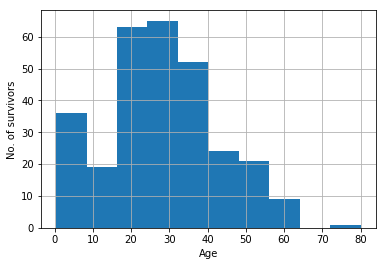

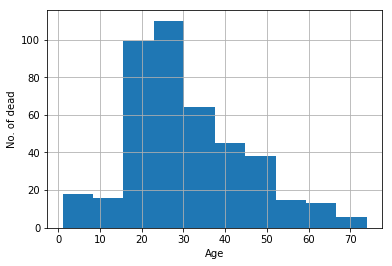

In [5]:
survived['Age'].hist()
plt.xlabel('Age')
plt.ylabel('No. of survivors')
plt.show()
dead['Age'].hist()
plt.xlabel('Age')
plt.ylabel('No. of dead')
plt.show()

In [6]:
new_df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Embarked'], axis=1)
new_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [7]:
# Separate the data frame into input and target variable
Y = new_df['Survived']
X = new_df.drop('Survived', axis=1)

In [8]:
# Function to replace NaN Age values with mean age
def fillna_age(dataframe, mean_age):
    dataframe['Age'] = dataframe.Age.apply(lambda x: x if not pd.isnull(x) else mean_age)
    return dataframe

In [9]:
# Function to convert Sex to numeric values
def convert_sex_numeric(dataframe):
    dataframe['Sex'] = dataframe.Sex.apply(lambda x: 1 if x == 'male' else 0)
    return dataframe

In [10]:
# Replace null 'Age' values with the mean age
mean_age = X['Age'].mean()
X = fillna_age(X, mean_age)
X = convert_sex_numeric(X) 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=25)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=25, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X_test), y_test))

0.810055865922


In [14]:
# Load test data
test_df = pd.read_csv('test.csv')
test_pid = test_df['PassengerId']
test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Embarked'], axis=1, inplace=True)
test_df.head()

Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  34.5      0      0   7.8292
1       3  female  47.0      1      0   7.0000
2       2    male  62.0      0      0   9.6875
3       3    male  27.0      0      0   8.6625
4       3  female  22.0      1      1  12.2875

In [15]:
test_df = fillna_age(test_df, mean_age)
test_df = convert_sex_numeric(test_df)

In [16]:
test_df.head(15)
avg_fare = X['Fare'].mean()
test_df['Fare'].fillna(avg_fare, inplace=True)

In [24]:
# Use the trained model to make predictions on the test data
predictions = model.predict(test_df)
predDF = pd.DataFrame(data=predictions, columns=['Survived'])
predDF.head(20)

Survived
0          0
1          0
2          0
3          0
4          1
5          0
6          1
7          0
8          1
9          0
10         0
11         0
12         1
13         0
14         1
15         1
16         0
17         0
18         1
19         0

In [26]:
df1 = pd.DataFrame(test_pid, columns=['PassengerId'])
output = pd.concat([df1, predDF], axis=1)
output.head()

   PassengerId
0          892
1          893
2          894
3          895
4          896
   Survived
0         0
1         0
2         0
3         0
4         1


PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [28]:
output.to_csv('submission.csv', index=False)